# Requirements

In [19]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("climate-data.csv")
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(keys=["date"], inplace=True)
df.sort_index(inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


Explore the dataset using visualizations of your choice.

<Axes: >

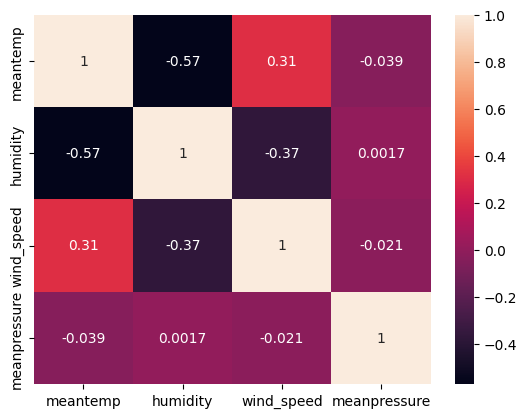

In [5]:
# Write your code here. Add as many boxes as you need.
sns.heatmap(df.corr(), annot=True)

In [6]:
features = ['humidity',	'wind_speed', 'meanpressure']
target = 'meantemp'

In [7]:

df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [8]:
# Write your code here. Add as many boxes as you need.
lags = range(3, 0, -1)
list(lags)

[3, 2, 1]

In [9]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,meantemp,humidity,wind_speed,meanpressure,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.500000,0.000000,1015.666667,10.000000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000
2013-01-04,8.666667,71.333333,1.233333,1017.166667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391
2016-12-30,14.095238,89.666667,6.266667,1017.904762,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095


In [10]:
df.drop(columns=features, inplace=True)
df.dropna(axis=0, inplace=True)
df

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1
date,,,,,,,,,,,,,
2013-01-04,8.666667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667
2013-01-05,6.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667
2013-01-06,7.000000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000
2013-01-07,7.000000,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000
2013-01-08,8.857143,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [12]:
# Write your code here. Add as many boxes as you need.
X, y = df.drop(columns=[target]), df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [14]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [15]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1167, 3, 4)

## Ensemble Learning Methods

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [16]:
# Write your code here. Add as many boxes as you need.
regressor = XGBRegressor(n_estimators=20).fit(train_X, train_y)

Use the trained model to make predictions for the test set.

In [17]:
# Write your code here. Add as many boxes as you need.
pred_y = regressor.predict(test_X)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [18]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(1.4659682822219655),
 np.float64(3.790469943746388),
 0.8816643964635816)

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [20]:
# Write your code here. Add as many boxes as you need.
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        "n_estimators": [10, 15, 20, 25, 30],
        "max_depth": [2, 3, 4, 5, 6, 7]
    },
    cv=TimeSeriesSplit(n_splits=5)
)

In [21]:
grid_search.fit(train_X, train_y)

D:\anaconda\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [10, 15, 20, 25, 30]})

In [22]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [23]:
regressor = XGBRegressor(n_estimators=10, max_depth=3).fit(train_X, train_y)

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [24]:
# Write your code here. Add as many boxes as you need.
pred_y = regressor.predict(test_X)

In [25]:
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(1.399435780145107),
 np.float64(3.1043187412383633),
 0.9030855178208386)

<Axes: xlabel='date'>

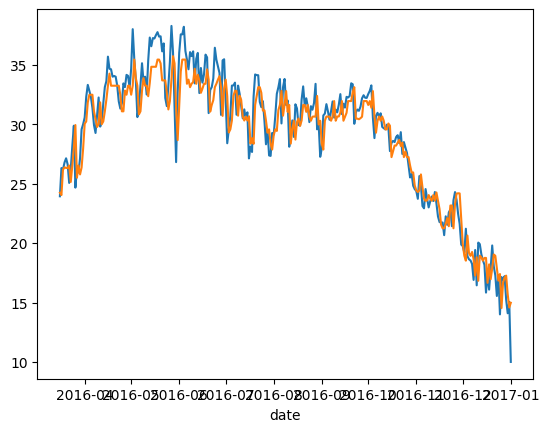

In [26]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y)

# LSTM

In [32]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [27]:
X, y = df.drop(columns=[target]), df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [28]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [29]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [30]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1167, 3, 4)

In [31]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [33]:
train_X.shape

(1167, 3, 4)

In [34]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [37]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3319 - mean_squared_error: 0.3319 - val_loss: 0.2100 - val_mean_squared_error: 0.2100
Epoch 2/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2288 - mean_squared_error: 0.2288 - val_loss: 0.0873 - val_mean_squared_error: 0.0873
Epoch 3/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0962 - mean_squared_error: 0.0962 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 4/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0660 - mean_squared_error: 0.0660 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 5/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 6/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 7/16
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0077 - va

<Axes: >

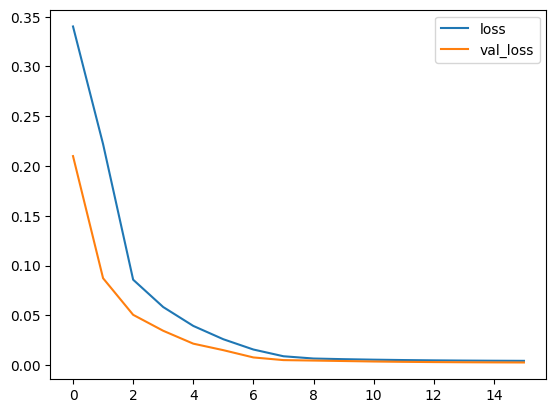

In [38]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [39]:
pred_y = model.predict(test_X)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [40]:
pred_y = scaler.inverse_transform(pred_y)

In [41]:
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(6.262732186914852),
 np.float64(1668.767864965319),
 -51.097670049765206)